In [1]:
import torch
from torch.utils.data import DataLoader

from reggae.data_loaders.datasets import RotNISTDataset
from reggae.gp.variational import ConvLFM, ExponentialLFM
from reggae.gp.variational.trainer import Trainer
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np


### Dataset

In [2]:
dataset = RotNISTDataset()

num_latents = 1
num_outputs = 10

t_inducing = torch.linspace(0, 1, 9, dtype=torch.float32).reshape((-1, 1))
t_observed = torch.linspace(0, 1, 16).view(-1)

t_predict = torch.linspace(0, 1, 30)


torch.Size([16, 784])
tensor([[0.0000],
        [0.0667],
        [0.1333],
        [0.2000],
        [0.2667],
        [0.3333],
        [0.4000],
        [0.4667],
        [0.5333],
        [0.6000],
        [0.6667],
        [0.7333],
        [0.8000],
        [0.8667],
        [0.9333],
        [1.0000]])


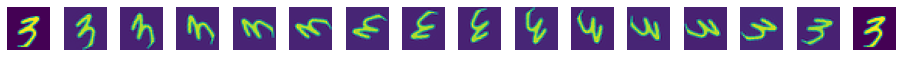

In [3]:
print(dataset[0][1].shape)
print(dataset[0][0])
plt.figure(figsize=(16, 15))
for i in range(16):
    plt.subplot(16, 16, i+1)
    plt.imshow(dataset[0][1][i].view(28, 28))
    plt.axis('off')

In [4]:
model = ConvLFM(num_outputs, num_latents,
                t_inducing, dataset, extra_points=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
trainer = Trainer(model, optimizer, dataset, give_output=True)

28


C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=False)


### Outputs prior to training:

torch.float32
torch.Size([16, 784])


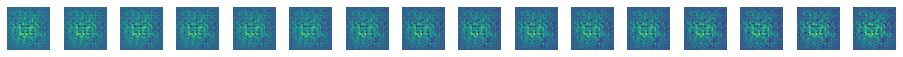

In [5]:
rtol = 1e-4
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

for i, data in enumerate(data_loader):
    t, y = data
    t, y = t[0].reshape(-1), y[0]
    print(t.dtype)
    initial_value = y[0].type(torch.float32)
    output = model(t, initial_value, rtol=rtol, atol=atol, num_samples=2)
    output = torch.squeeze(output).detach()

    break

# output shape # (T, W, W)
print(output.shape)
plt.figure(figsize=(16, 15))

for i in range(16):
    plt.subplot(16, 16, i+1)
    # plt.imshow(dataset[0][1][i].view(28, 28))
    plt.imshow(output[i].view(28, 28))
    plt.axis('off')


# plotter.plot_latents(t_predict)

Epoch 1/1 - Loss: 17410.30 (17410.30 0.00) λ: 0.200
Epoch 1/1 - Loss: 24394.98 (24394.98 0.00) λ: 0.201
Epoch 1/1 - Loss: 12663.89 (12663.89 0.00) λ: 0.201
Epoch 1/1 - Loss: 8715.74 (8715.74 0.00) λ: 0.201
Epoch 1/1 - Loss: 7083.49 (7083.49 0.00) λ: 0.201
Epoch 1/1 - Loss: 6586.18 (6586.18 0.00) λ: 0.201
Epoch 1/1 - Loss: 6243.46 (6243.46 0.00) λ: 0.201
Epoch 1/1 - Loss: 7380.41 (7380.41 0.00) λ: 0.201
Epoch 1/1 - Loss: 6004.55 (6004.55 0.00) λ: 0.201
Epoch 1/1 - Loss: 6067.44 (6067.44 0.00) λ: 0.201
Epoch 1/1 - Loss: 7004.25 (7004.25 0.00) λ: 0.202
Epoch 1/1 - Loss: 6192.64 (6192.64 0.00) λ: 0.202
Epoch 1/1 - Loss: 5979.46 (5979.46 0.00) λ: 0.202
Epoch 1/1 - Loss: 5900.32 (5900.32 0.00) λ: 0.202
Epoch 1/1 - Loss: 7406.58 (7406.58 0.00) λ: 0.202
Epoch 1/1 - Loss: 6678.52 (6678.52 0.00) λ: 0.202
Epoch 1/1 - Loss: 5749.62 (5749.62 0.00) λ: 0.202
Epoch 1/1 - Loss: 7703.91 (7703.91 0.00) λ: 0.202
Epoch 1/1 - Loss: 5614.63 (5614.63 0.00) λ: 0.202
Epoch 1/1 - Loss: 5233.56 (5233.56 0.00) λ: 

ValueError: x and y must have same first dimension, but have shapes torch.Size([16]) and (784,)

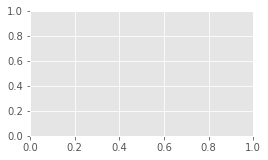

In [6]:
tol = 1e-4
import time
start = time.time()

# trainer = Trainer(optimizer)
output = trainer.train(1, rtol=tol, atol=tol/10,
                       report_interval=1, plot_interval=5, num_samples=1)
end = time.time()
print(end - start)

tensor([0.0000, 0.0667, 0.1333, 0.2000, 0.2667, 0.3333, 0.4000, 0.4667, 0.5333,
        0.6000, 0.6667, 0.7333, 0.8000, 0.8667, 0.9333, 1.0000])
torch.Size([30, 784])


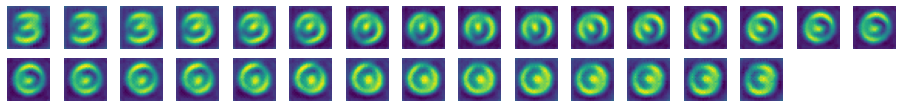

In [8]:
num_test_points = 30
for i, data in enumerate(data_loader):
    t, y = data
    t, y = t[0].reshape(-1), y[0]
    print(t)
    t_pred = torch.linspace(0, 1, num_test_points)
    initial_value = y[0].type(torch.float32)
    output = model(t_pred, initial_value, rtol=rtol, atol=atol, num_samples=2)
    output = torch.squeeze(output).detach()

    break

# output shape # (T, W, W)
print(output.shape)
plt.figure(figsize=(16, 15))

for i in range(num_test_points):
    plt.subplot(16, 16, i+1)
    # plt.imshow(dataset[0][1][i].view(28, 28))
    plt.imshow(output[i].view(28, 28))
    plt.axis('off')

(-0.5, 20.5, 49.5, -0.5)

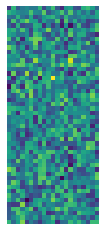

In [27]:
plt.imshow(list(list(model.mlp.modules())[1].parameters())[0].detach())
plt.axis('off')

In [ ]:
q_f = model.get_latents(t_predict)
mean = q_f.mean.detach()  # (5,16)
colors = ['red', 'yellow', 'purple', 'green', 'blue']
for i in range(num_latents):
    # for _ in range(2):
    #     plt.plot(t_predict, q_f.sample()[i], c=colors[i], alpha=0.2)
    plt.plot(t_predict, mean[i], c=colors[i])

In [ ]:
t = torch.tensor([-0.0630, -0.0130,  0.0370,  0.0870,  0.1370])
Ksm = model.rbf(t, model.inducing_inputs)  # (I, T*, Tu)
α = torch.matmul(Ksm, model.inv_Kmm)  # (I, T*, Tu)
m_s = torch.matmul(α, model.q_m)  # (I, T*, Tu)
Kss = model.rbf(t)  # (I, T*, T*)
S_Kmm = model.S - model.Kmm # (I, Tu, Tu)
AS_KA = torch.matmul(torch.matmul(α, S_Kmm), torch.transpose(α, 1, 2)) # (I, T*, T*)
S_s = (Kss + AS_KA) # (I, T*, T*)
print(S_s.shape)
for i in range(5):
    plt.figure()
    plt.imshow(S_s[i].detach())
    print(S_s[i])
    print(torch.cholesky(S_s[i]))

In [ ]:
S = torch.tensor([[[1.3302, 1.3217, 1.3009, 1.2674, 1.2206],
         [1.3217, 1.3265, 1.3185, 1.2966, 1.2601],
         [1.3009, 1.3185, 1.3242, 1.3161, 1.2928],
         [1.2674, 1.2966, 1.3161, 1.3230, 1.3150],
         [1.2206, 1.2601, 1.2928, 1.3150, 1.3236]],

        [[1.3115, 1.3100, 1.2917, 1.2580, 1.2092],
         [1.3100, 1.3219, 1.3166, 1.2946, 1.2566],
         [1.2917, 1.3166, 1.3250, 1.3168, 1.2922],
         [1.2580, 1.2946, 1.3168, 1.3235, 1.3144],
         [1.2092, 1.2566, 1.2922, 1.3144, 1.3216]],

        [[1.2992, 1.3002, 1.2817, 1.2449, 1.1924],
         [1.3002, 1.3166, 1.3132, 1.2909, 1.2516],
         [1.2817, 1.3132, 1.3250, 1.3178, 1.2930],
         [1.2449, 1.2909, 1.3178, 1.3261, 1.3165],
         [1.1924, 1.2516, 1.2930, 1.3165, 1.3227]],

        [[1.3350, 1.3282, 1.3071, 1.2723, 1.2245],
         [1.3282, 1.3320, 1.3221, 1.2986, 1.2613],
         [1.3071, 1.3221, 1.3251, 1.3151, 1.2912],
         [1.2723, 1.2986, 1.3151, 1.3200, 1.3115],
         [1.2245, 1.2613, 1.2912, 1.3115, 1.3195]],

        [[1.2587, 1.2606, 1.2434, 1.2080, 1.1572],
         [1.2606, 1.2818, 1.2828, 1.2642, 1.2280],
         [1.2434, 1.2828, 1.3019, 1.3006, 1.2801],
         [1.2080, 1.2642, 1.3006, 1.3166, 1.3126],
         [1.1572, 1.2280, 1.2801, 1.3126, 1.3253]]])
S = S.type(torch.float64)
print(S.dtype)
print(torch.cholesky(S[0]))

### Outputs after training

In [ ]:
tol = 1e-6
# plotter = Plotter(model, dataset.gene_names, t_inducing)

# plot_losses(trainer)
plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [ ]:
save(model, 'variational_linear')

In [ ]:
model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs, t_inducing, t_observed)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))